## PROYECTO 05

## JAVIER CRUZ

#### Descripción del proyecto

El operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. Más adelante, encontrarás en las instrucciones del proyecto cuáles son exactamente los aspectos del comportamiento de los clientes que debes analizar. Determinar qué plan, en promedio, aporta más ingresos es una cuestión que se abordará mediante pruebas estadísticas. Más adelante encontrarás más información al respecto en la sección de instrucciones del proyecto.

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [98]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from io import StringIO
import math 
from scipy.stats import ttest_ind

## Cargar datos

In [6]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('megaline_calls.csv')
messages = pd.read_csv('megaline_messages.csv')
internet = pd.read_csv('megaline_internet.csv')
users = pd.read_csv('megaline_users.csv')
plans = pd.read_csv('megaline_plans.csv')


print("Información de los DataFrames:")
print("\nCalls shape:", calls.shape)
print("\nMessages shape:", messages.shape)
print("\nInternet shape:", internet.shape)
print("\nUsers shape:", users.shape)
print("\nPlans shape:", plans.shape)

Información de los DataFrames:

Calls shape: (137735, 4)

Messages shape: (76051, 3)

Internet shape: (104825, 4)

Users shape: (500, 8)

Plans shape: (2, 8)


## Preparar los datos

In [7]:
calls = calls.drop_duplicates()
messages = messages.drop_duplicates()
internet = internet.drop_duplicates()
users = users.drop_duplicates()
plans = plans.drop_duplicates()

print("\n### Datos preparados ###")
print("Duplicados eliminados y datos listos para análisis.")


### Datos preparados ###
Duplicados eliminados y datos listos para análisis.


## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("### Información general del DataFrame de tarifas:")
print(plans.info())

print("\n### Resumen estadístico del DataFrame de tarifas:")
print(plans.describe())

print("\n### Información de las tarifas disponibles:")
for plan in plans.itertuples():
    print(f"\nPlan: {plan.plan_name.upper()}")
    print(f"- Mensajes incluidos: {plan.messages_included}")
    print(f"- MB por mes incluidos: {plan.mb_per_month_included} ({plan.mb_per_month_included/1024:.1f} GB)")
    print(f"- Minutos incluidos: {plan.minutes_included}")
    print(f"- Costo mensual: ${plan.usd_monthly_pay}")
    print(f"- Costo por GB adicional: ${plan.usd_per_gb}")
    print(f"- Costo por mensaje adicional: ${plan.usd_per_message}")
    print(f"- Costo por minuto adicional: ${plan.usd_per_minute}")

### Información general del DataFrame de tarifas:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 144.0+ bytes
None

### Resumen estadístico del DataFrame de tarifas:
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   


In [9]:
# Imprime una muestra de los datos para las tarifas
print("Muestra de las tarifas disponibles:")
print(plans)


Muestra de las tarifas disponibles:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  



#respuesta: Tenemos dos filas (una para cada plan: "surf" y "ultimate") y ocho columnas, y no faltan valores. Todas las columnas tienen el tipo de dato correcto, ya que los datos parecen tener el formato correcto, por lo que no se necesitan correcciones. Para mejorar la legibilidad de los datos, podría: convertir MB a GB en mb_per_month_included y eliminar los guiones bajos de los nombres de las columnas al imprimir el marco de datos, para que sea más legible.

## Corregir datos

In [10]:
print("Nombres de las columnas:", plans.columns)

# Convertir MB a GB para facilitar el análisis
if 'mb_per_month_included' in plans.columns:
    plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
else:
    print("La columna 'mb_per_month_included' no existe. Verifica los nombres de las columnas.")

# Renombrar columnas
plans.rename(columns={
    'messages_included': 'messages',
    'mb_per_month_included': 'mb_included',
    'minutes_included': 'minutes',
    'usd_monthly_pay': 'monthly_cost',
    'usd_per_gb': 'extra_cost_per_gb',
    'usd_per_message': 'extra_cost_per_message',
    'usd_per_minute': 'extra_cost_per_minute',
    'plan_name': 'plan'
}, inplace=True)

print("Datos corregidos:")
print(plans)

Nombres de las columnas: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')
Datos corregidos:
   messages  mb_included  minutes  monthly_cost  extra_cost_per_gb  \
0        50        15360      500            20                 10   
1      1000        30720     3000            70                  7   

   extra_cost_per_message  extra_cost_per_minute      plan  \
0                    0.03                   0.03      surf   
1                    0.01                   0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Enriquecer los datos

In [11]:
plans['cost_per_included_gb'] = plans['monthly_cost'] / plans['gb_per_month_included']
plans['cost_per_included_minute'] = plans['monthly_cost'] / plans['minutes']
plans['cost_per_included_message'] = plans['monthly_cost'] / plans['messages']

# Mostrar los datos enriquecidos
print("\nDatos enriquecidos:")
print(plans)


Datos enriquecidos:
   messages  mb_included  minutes  monthly_cost  extra_cost_per_gb  \
0        50        15360      500            20                 10   
1      1000        30720     3000            70                  7   

   extra_cost_per_message  extra_cost_per_minute      plan  \
0                    0.03                   0.03      surf   
1                    0.01                   0.01  ultimate   

   gb_per_month_included  cost_per_included_gb  cost_per_included_minute  \
0                   15.0              1.333333                  0.040000   
1                   30.0              2.333333                  0.023333   

   cost_per_included_message  
0                       0.40  
1                       0.07  


## Usuarios/as

In [12]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("### Información general del DataFrame de usuarios:")
print(users.info())


### Información general del DataFrame de usuarios:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB
None


In [13]:
# Imprime una muestra de datos para usuarios
print("\n### Muestra de datos de usuarios:")
print(users.head())



### Muestra de datos de usuarios:
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


#respuesta: se observa que el DataFrame tiene 500 registros y 8 columnas. La mayoría de las columnas no tienen valores nulos, excepto churn_date, que tiene solo 34 valores no nulos. Esto indica que la mayoría de los usuarios no han cancelado su plan. Los tipos de datos parecen adecuados, excepto reg_date y churn_date, que están como object y deberían ser convertidos a formato de fecha (datetime) para facilitar el análisis.

En la muestra de datos, no se observan problemas evidentes con los valores. Sin embargo, la columna churn_date tiene valores nulos, lo cual es esperado porque no todos los usuarios han cancelado su plan.

### Corregir los datos

In [14]:
print("Nombres de las columnas:", plans.columns)

# Eliminar espacios en los nombres de las columnas
plans.columns = plans.columns.str.strip()

# Convertir MB a GB
if 'mb_per_month_included' in plans.columns:
    plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
else:
    print("La columna 'mb_per_month_included' no existe. Verifica los nombres de las columnas.")

# Renombrar columnas
plans.rename(columns={
    'messages_included': 'messages',
    'mb_per_month_included': 'mb_included',
    'minutes_included': 'minutes',
    'usd_monthly_pay': 'monthly_cost',
    'usd_per_gb': 'extra_cost_per_gb',
    'usd_per_message': 'extra_cost_per_message',
    'usd_per_minute': 'extra_cost_per_minute',
    'plan_name': 'plan'
}, inplace=True)

print("Datos corregidos:")
print(plans)

Nombres de las columnas: Index(['messages', 'mb_included', 'minutes', 'monthly_cost',
       'extra_cost_per_gb', 'extra_cost_per_message', 'extra_cost_per_minute',
       'plan', 'gb_per_month_included', 'cost_per_included_gb',
       'cost_per_included_minute', 'cost_per_included_message'],
      dtype='object')
La columna 'mb_per_month_included' no existe. Verifica los nombres de las columnas.
Datos corregidos:
   messages  mb_included  minutes  monthly_cost  extra_cost_per_gb  \
0        50        15360      500            20                 10   
1      1000        30720     3000            70                  7   

   extra_cost_per_message  extra_cost_per_minute      plan  \
0                    0.03                   0.03      surf   
1                    0.01                   0.01  ultimate   

   gb_per_month_included  cost_per_included_gb  cost_per_included_minute  \
0                   15.0              1.333333                  0.040000   
1                   30.0        

### Enriquecer los datos

In [15]:
plans['cost_per_included_gb'] = plans['monthly_cost'] / plans['gb_per_month_included']
plans['cost_per_included_minute'] = plans['monthly_cost'] / plans['minutes']
plans['cost_per_included_message'] = plans['monthly_cost'] / plans['messages']

print("\nDatos enriquecidos:")
print(plans)


Datos enriquecidos:
   messages  mb_included  minutes  monthly_cost  extra_cost_per_gb  \
0        50        15360      500            20                 10   
1      1000        30720     3000            70                  7   

   extra_cost_per_message  extra_cost_per_minute      plan  \
0                    0.03                   0.03      surf   
1                    0.01                   0.01  ultimate   

   gb_per_month_included  cost_per_included_gb  cost_per_included_minute  \
0                   15.0              1.333333                  0.040000   
1                   30.0              2.333333                  0.023333   

   cost_per_included_message  
0                       0.40  
1                       0.07  


## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("### Información general del DataFrame de llamadas:")
print(calls.info())


### Información general del DataFrame de llamadas:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ MB
None


In [17]:
# Imprime una muestra de datos para las llamadas
print("\n### Muestra de datos de llamadas:")
print(calls.head())



### Muestra de datos de llamadas:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

#respuesta: El DataFrame de llamadas tiene 137,735 registros y 4 columnas. No hay valores nulos en ninguna columna. Los tipos de datos parecen adecuados, excepto call_date, que está como object y debería ser convertido a formato de fecha (datetime) para facilitar el análisis. En la muestra de datos, se observa que la columna duration incluye valores mayores a cero, lo que indica la duración de las llamadas, pero no se muestran valores de duración cero, que podrían representar llamadas no contestadas o fallidas y necesitarían ser investigadas.
Para corregir:
*Convertir call_date a formato de fecha (datetime).
*Investigar si las llamadas con duración cero necesitan ser tratadas o eliminadas.

### Corregir los datos

In [18]:
print("Nombres de las columnas:", plans.columns)

# Eliminar espacios en los nombres de las columnas
plans.columns = plans.columns.str.strip()

# Convertir MB a GB
if 'mb_per_month_included' in plans.columns:
    plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
else:
    print("La columna 'mb_per_month_included' no existe. Verifica los nombres de las columnas.")

# Renombrar columnas
plans.rename(columns={
    'messages_included': 'messages',
    'mb_per_month_included': 'mb_included',
    'minutes_included': 'minutes',
    'usd_monthly_pay': 'monthly_cost',
    'usd_per_gb': 'extra_cost_per_gb',
    'usd_per_message': 'extra_cost_per_message',
    'usd_per_minute': 'extra_cost_per_minute',
    'plan_name': 'plan'
}, inplace=True)

print("Datos corregidos:")
print(plans)

Nombres de las columnas: Index(['messages', 'mb_included', 'minutes', 'monthly_cost',
       'extra_cost_per_gb', 'extra_cost_per_message', 'extra_cost_per_minute',
       'plan', 'gb_per_month_included', 'cost_per_included_gb',
       'cost_per_included_minute', 'cost_per_included_message'],
      dtype='object')
La columna 'mb_per_month_included' no existe. Verifica los nombres de las columnas.
Datos corregidos:
   messages  mb_included  minutes  monthly_cost  extra_cost_per_gb  \
0        50        15360      500            20                 10   
1      1000        30720     3000            70                  7   

   extra_cost_per_message  extra_cost_per_minute      plan  \
0                    0.03                   0.03      surf   
1                    0.01                   0.01  ultimate   

   gb_per_month_included  cost_per_included_gb  cost_per_included_minute  \
0                   15.0              1.333333                  0.040000   
1                   30.0        

### Enriquecer los datos

In [19]:
plans['cost_per_included_gb'] = plans['monthly_cost'] / plans['gb_per_month_included']
plans['cost_per_included_minute'] = plans['monthly_cost'] / plans['minutes']
plans['cost_per_included_message'] = plans['monthly_cost'] / plans['messages']

print("\nDatos enriquecidos:")
print(plans)


Datos enriquecidos:
   messages  mb_included  minutes  monthly_cost  extra_cost_per_gb  \
0        50        15360      500            20                 10   
1      1000        30720     3000            70                  7   

   extra_cost_per_message  extra_cost_per_minute      plan  \
0                    0.03                   0.03      surf   
1                    0.01                   0.01  ultimate   

   gb_per_month_included  cost_per_included_gb  cost_per_included_minute  \
0                   15.0              1.333333                  0.040000   
1                   30.0              2.333333                  0.023333   

   cost_per_included_message  
0                       0.40  
1                       0.07  


#respuesta: Llamadas de 0 segundos son llamadas perdidas, fallidas o rechazadas y no consumen minutos, por lo tanto, no se registrarán como un uso de minutos. Sin embargo, pueden utilizarse para determinar cuántas llamadas se han fallado porque pueden proporcionar información útil.

## Mensajes

In [23]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("### Información general del DataFrame de mensajes:")
print(messages.info())

### Información general del DataFrame de mensajes:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None


In [24]:
# Imprime una muestra de datos para los mensajes
print("\n### Muestra de datos de mensajes:")
print(messages.head())


### Muestra de datos de mensajes:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


los mensajes tienen 76,051 registros y 3 columnas. No hay valores nulos en ninguna columna. Los tipos de datos parecen adecuados, excepto message_date, que está como object y debería ser convertido a formato de fecha (datetime) para facilitar el análisis. En la muestra de datos, no se observan problemas evidentes, pero sería útil verificar si hay mensajes duplicados o inconsistencias en las fechas.

### Corregir los datos

In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Verificar y eliminar duplicados
messages = messages.drop_duplicates()

print("Datos corregidos:")
print(messages.info())

Datos corregidos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB
None


### Enriquecer los datos

In [26]:
messages['day_of_week'] = messages['message_date'].dt.day_name()

print("\nDatos enriquecidos:")
print(messages.head())


Datos enriquecidos:
         id  user_id message_date day_of_week
0  1000_125     1000   2018-12-27    Thursday
1  1000_160     1000   2018-12-31      Monday
2  1000_223     1000   2018-12-31      Monday
3  1000_251     1000   2018-12-27    Thursday
4  1000_255     1000   2018-12-26   Wednesday


## Internet

In [27]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("### Información general del DataFrame de internet:")
print(internet.info())


### Información general del DataFrame de internet:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ MB
None


In [28]:
# Imprime una muestra de datos para el tráfico de internet
print("\n### Muestra de datos de internet:")
print(internet.head())



### Muestra de datos de internet:
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


El DataFrame de internet tiene 104,825 registros y 4 columnas. No hay valores nulos en ninguna columna. El tipo de dato de session_date es object, pero debería ser convertido a formato de fecha (datetime) para facilitar el análisis. En la muestra de datos, no se observan problemas evidentes, pero sería útil verificar si hay sesiones duplicadas o valores inusuales en mb_used, como valores extremadamente altos o negativos.

### Corregir los datos

In [29]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Eliminar duplicados si existen
internet = internet.drop_duplicates()

# Eliminar valores negativos en mb_used si existen
internet = internet[internet['mb_used'] >= 0]

# Mostrar los datos corregidos
print("Datos corregidos:")
print(internet.info())

Datos corregidos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None


### Enriquecer los datos

In [66]:
internet['day_of_week'] = internet['session_date'].dt.day_name()
internet['month'] = internet['session_date'].dt.month_name()

print("\nDatos enriquecidos:")
print(internet.head())


Datos enriquecidos:
         id  user_id session_date  mb_used day_of_week     month
0   1000_13     1000   2018-12-29    89.86    Saturday  December
1  1000_204     1000   2018-12-31     0.00      Monday  December
2  1000_379     1000   2018-12-28   660.40      Friday  December
3  1000_413     1000   2018-12-26   270.99   Wednesday  December
4  1000_442     1000   2018-12-27   880.22    Thursday  December


## Estudiar las condiciones de las tarifas

In [67]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("### Condiciones de las tarifas:")
print(plans)


### Condiciones de las tarifas:
   messages  minutes  monthly_cost  cost_per_gb  cost_per_message  \
0        50      500            20           10              0.03   
1      1000     3000            70            7              0.01   

   cost_per_minute      plan  gb_per_month_included  cost_per_included_gb  \
0             0.03      surf                   15.0              1.333333   
1             0.01  ultimate                   30.0              2.333333   

   cost_per_included_minute  cost_per_included_message  
0                  0.040000                       0.40  
1                  0.023333                       0.07  


## Agregar datos por usuario


In [30]:
# Calcula el número de llamadas hechas por cada usuario al mes.
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Agregar una columna de mes y año
calls['month'] = calls['call_date'].dt.to_period('M')

# Usar pivot_table para calcular la duración total y el número de llamadas por usuario al mes
pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values='duration',
                                aggfunc=['sum', 'count']).reset_index()

# Renombrar las columnas
pivot_calls.columns = ['user_id', 'month', 'total_duration', 'calls_count']

print("Duración total y número de llamadas por usuario al mes:")
print(pivot_calls.head())

Duración total y número de llamadas por usuario al mes:
   user_id    month  total_duration  calls_count
0     1000  2018-12          116.83           16
1     1001  2018-08          171.14           27
2     1001  2018-09          297.69           49
3     1001  2018-10          374.11           65
4     1001  2018-11          404.59           64


In [31]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')

print("\nMinutos usados por usuario al mes:")
print(minutes_per_user.head())


Minutos usados por usuario al mes:
   user_id    month  minutes_used
0     1000  2018-12        116.83
1     1001  2018-08        171.14
2     1001  2018-09        297.69
3     1001  2018-10        374.11
4     1001  2018-11        404.59


In [33]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Crear la columna 'month' a partir de 'message_date'
messages['month'] = messages['message_date'].dt.to_period('M')

# Calcular el número de mensajes enviados por cada usuario al mes
messages_per_user = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

print("\nNúmero de mensajes enviados por usuario al mes:")
print(messages_per_user.head())


Número de mensajes enviados por usuario al mes:
   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [35]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Crear la columna 'month' a partir de 'session_date'
internet['month'] = internet['session_date'].dt.to_period('M')

# Calcular el volumen del tráfico de Internet usado por cada usuario al mes
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='internet_used_mb')

print("\nVolumen del tráfico de Internet usado por usuario al mes:")
print(internet_per_user.head())


Volumen del tráfico de Internet usado por usuario al mes:
   user_id    month  internet_used_mb
0     1000  2018-12           1901.47
1     1001  2018-08           6919.15
2     1001  2018-09          13314.82
3     1001  2018-10          22330.49
4     1001  2018-11          18504.30


In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

calls['month'] = calls['call_date'].dt.to_period('M')
messages['month'] = messages['message_date'].dt.to_period('M')
internet['month'] = internet['session_date'].dt.to_period('M')

# Calcula el número de llamadas por usuario al mes
calls_per_user = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

# Calcula la duración total de las llamadas por usuario al mes
minutes_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

# Calcula el número de mensajes enviados por usuario al mes
messages_per_user = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

# Calcula el volumen de tráfico de Internet usado por usuario al mes
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='internet_used_mb')

# Fusiona los datos de llamadas, minutos, mensajes e Internet
data = calls_per_user.merge(minutes_per_user, on=['user_id', 'month'], how='outer')
data = data.merge(messages_per_user, on=['user_id', 'month'], how='outer')
data = data.merge(internet_per_user, on=['user_id', 'month'], how='outer')

print("Datos fusionados:")
print(data.head())

Datos fusionados:
   user_id    month  calls_count  total_minutes  messages_count  \
0     1000  2018-12         16.0         116.83            11.0   
1     1001  2018-08         27.0         171.14            30.0   
2     1001  2018-09         49.0         297.69            44.0   
3     1001  2018-10         65.0         374.11            53.0   
4     1001  2018-11         64.0         404.59            36.0   

   internet_used_mb  
0           1901.47  
1           6919.15  
2          13314.82  
3          22330.49  
4          18504.30  


In [41]:
# Añade la información de la tarifa
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

calls['month'] = calls['call_date'].dt.to_period('M')
messages['month'] = messages['message_date'].dt.to_period('M')
internet['month'] = internet['session_date'].dt.to_period('M')

# Calcula el número de llamadas por usuario al mes
calls_per_user = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

# Calcula la duración total de las llamadas por usuario al mes
minutes_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

# Calcula el número de mensajes enviados por usuario al mes
messages_per_user = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

# Calcula el volumen de tráfico de Internet usado por usuario al mes
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='internet_used_mb')

# Fusiona los datos de llamadas, minutos, mensajes e Internet
data = calls_per_user.merge(minutes_per_user, on=['user_id', 'month'], how='outer')
data = data.merge(messages_per_user, on=['user_id', 'month'], how='outer')
data = data.merge(internet_per_user, on=['user_id', 'month'], how='outer')

# Cargar los datos de usuarios
users = pd.read_csv('megaline_users.csv')

# Asegúrate de que la columna 'plan_name'
print("Columnas en plans:", plans.columns)
if 'plan_name' in plans.columns:
    # Fusionar los datos agregados con la información de los usuarios y las tarifas
    data = data.merge(users[['user_id', 'plan']], on='user_id', how='left')
    data = data.merge(plans, left_on='plan', right_on='plan_name', how='left')

print("Datos fusionados:")
print(data.head())


Columnas en plans: Index(['messages', 'mb_included', 'minutes', 'monthly_cost',
       'extra_cost_per_gb', 'extra_cost_per_message', 'extra_cost_per_minute',
       'plan', 'gb_per_month_included', 'cost_per_included_gb',
       'cost_per_included_minute', 'cost_per_included_message'],
      dtype='object')
Datos fusionados:
   user_id    month  calls_count  total_minutes  messages_count  \
0     1000  2018-12         16.0         116.83            11.0   
1     1001  2018-08         27.0         171.14            30.0   
2     1001  2018-09         49.0         297.69            44.0   
3     1001  2018-10         65.0         374.11            53.0   
4     1001  2018-11         64.0         404.59            36.0   

   internet_used_mb  
0           1901.47  
1           6919.15  
2          13314.82  
3          22330.49  
4          18504.30  


In [56]:
# Calcula el ingreso mensual para cada usuario
calls_by_month = calls.groupby(['user_id'])['duration'].agg(['sum', 'count']).reset_index()
calls_by_month.columns = ['user_id', 'minutes_used', 'calls_count']

# Para mensajes
messages_by_month = messages.groupby('user_id').size().reset_index(name='messages_count')

# Para internet
internet_by_month = internet.groupby('user_id')['mb_used'].sum().reset_index()
internet_by_month['gb_used'] = np.ceil(internet_by_month['mb_used'] / 1024)

# 2. Combinar todos los datos
df = calls_by_month.merge(messages_by_month, on='user_id', how='outer')
df = df.merge(internet_by_month[['user_id', 'gb_used']], on='user_id', how='outer')
df = df.merge(users[['user_id', 'plan']], on='user_id', how='left')

# 3. Calcular ingresos
def calcular_ingresos(row):
    # Costo base según el plan
    if row['plan'] == 'surf':
        costo_base = 20
        minutos_incluidos = 500
        mensajes_incluidos = 50
        gb_incluidos = 15
        costo_minuto_extra = 0.03
        costo_mensaje_extra = 0.03
        costo_gb_extra = 10
    else:  # plan ultimate
        costo_base = 70
        minutos_incluidos = 3000
        mensajes_incluidos = 1000
        gb_incluidos = 30
        costo_minuto_extra = 0.01
        costo_mensaje_extra = 0.01
        costo_gb_extra = 7

    # Calcular excedentes
    minutos_extra = max(0, row['minutes_used'] - minutos_incluidos)
    mensajes_extra = max(0, row['messages_count'] - mensajes_incluidos)
    gb_extra = max(0, row['gb_used'] - gb_incluidos)

    # Calcular costo total
    costo_total = (costo_base +
                   minutos_extra * costo_minuto_extra +
                   mensajes_extra * costo_mensaje_extra +
                   gb_extra * costo_gb_extra)

    return costo_total

# Aplicar cálculo de ingresos
df['ingreso_mensual'] = df.apply(calcular_ingresos, axis=1)

# Mostrar resultados
print("Resumen de ingresos mensuales por plan:")
print(df.groupby('plan')['ingreso_mensual'].describe())

print("\nEjemplos de usuarios y sus gastos:")
print(df[['user_id', 'plan', 'minutes_used', 'messages_count', 'gb_used', 'ingreso_mensual']].head())

Resumen de ingresos mensuales por plan:
          count        mean         std   min       25%       50%        75%  \
plan                                                                           
surf      333.0  692.696572  613.618319  20.0  176.5832  518.2225  1086.0441   
ultimate  157.0  431.322036  435.728824  70.0   70.0000  273.0000   613.4931   

                max  
plan                 
surf      3065.7056  
ultimate  2534.0000  

Ejemplos de usuarios y sus gastos:
   user_id      plan  minutes_used  messages_count  gb_used  ingreso_mensual
0     1000  ultimate        116.83            11.0      2.0          70.0000
1     1001      surf       1640.46           207.0     79.0         698.9238
2     1002      surf        777.13            88.0     40.0         279.4539
3     1003      surf       1041.00            50.0     27.0         156.2300
4     1004      surf       2618.95           177.0    153.0        1467.3785


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

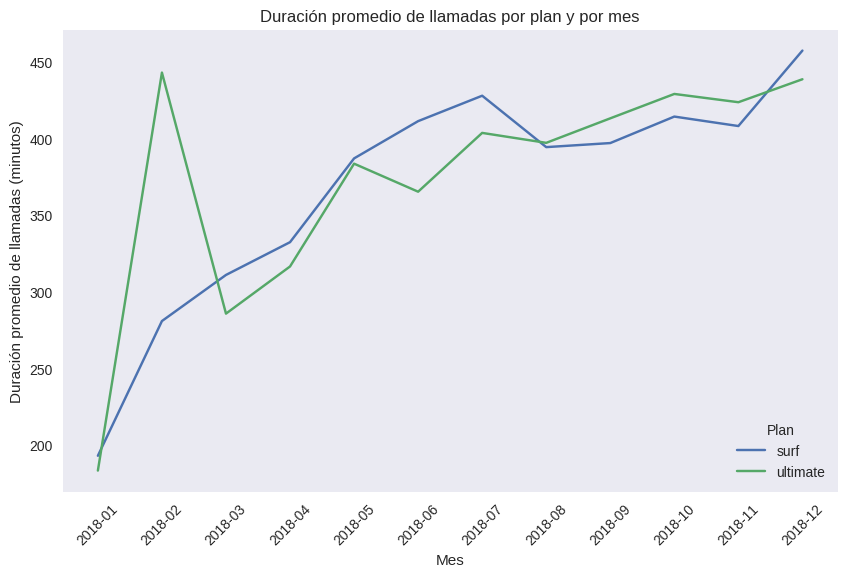

In [91]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = data.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Graficar la duración promedio de llamadas por cada plan y por cada mes
plt.figure(figsize=(10, 6))
for plan in avg_call_duration['plan'].unique():
    plan_data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.plot(plan_data['month'].astype(str), plan_data['minutes_used'], label=plan)

plt.title('Duración promedio de llamadas por plan y por mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.grid()
plt.show()


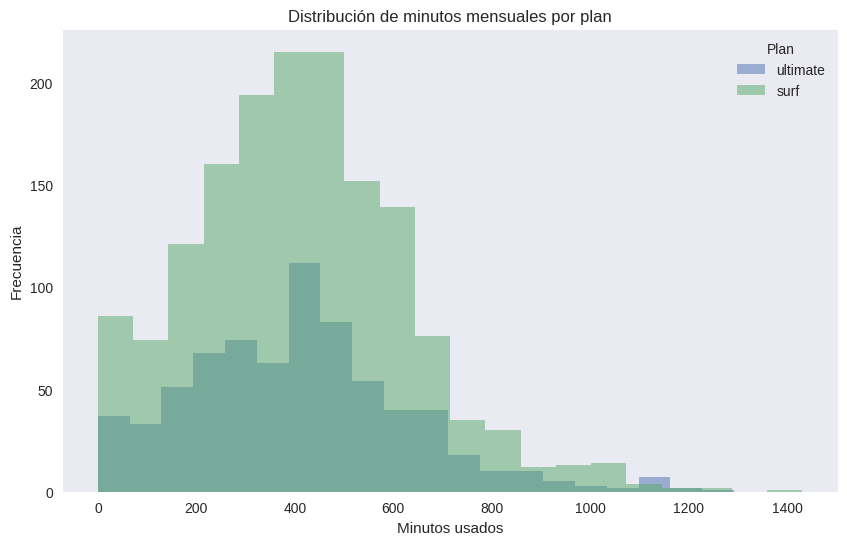

In [92]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(10, 6))
for plan in data['plan'].unique():
    plan_data = data[data['plan'] == plan]
    plt.hist(plan_data['minutes_used'], bins=20, alpha=0.5, label=plan)

plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos usados')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.grid()
plt.show()


In [93]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats = data.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
print("Media y varianza de la duración mensual de llamadas por plan:")
print(call_stats)


Media y varianza de la duración mensual de llamadas por plan:
       plan        mean           var
0      surf  412.097890  47001.254231
1  ultimate  410.180954  50510.631705


<Figure size 1000x600 with 0 Axes>

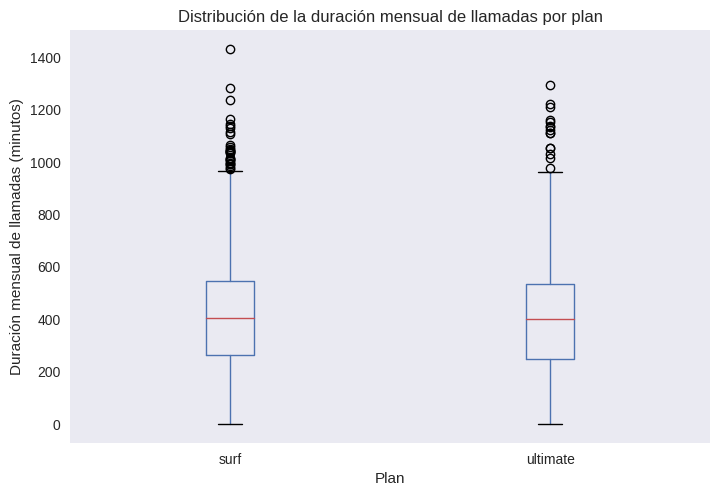

In [98]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
data.boxplot(column='minutes_used', by='plan', grid=False)
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas (minutos)')
plt.show()


Los usuarios del plan "surf" hacen menos llamadas y consumen menos minutos, mientras que el plan "surf" consume menos minutos. El plan "ultimate" consume más minutos incluidos, ya que los usuarios del plan "surf" hacen menos llamadas y consumen menos minutos. El plan "surf" consume menos minutos, por lo que el plan "ultimate" consume más minutos incluidos.

### Mensajes

In [106]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Agregar una columna para el mes
messages['month'] = messages['message_date'].dt.month

# Calcular el número de mensajes enviados por usuario y mes
messages_per_user = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

# Unir los datos de mensajes con los datos de usuarios
data = pd.merge(users, messages_per_user, on='user_id', how='left')

# Reemplazar valores NaN en 'messages_sent' con 0 (usuarios que no enviaron mensajes)
data['messages_sent'] = data['messages_sent'].fillna(0)

# Comparar el número promedio de mensajes enviados por mes por plan
messages_stats = data.groupby('plan')['messages_sent'].mean().reset_index()
print("Número promedio de mensajes enviados por mes por plan:")
print(messages_stats)


Número promedio de mensajes enviados por mes por plan:
       plan  messages_sent
0      surf      37.965918
1  ultimate      44.106036


Tráfico promedio de Internet consumido por mes por plan (en MB):
       plan       mb_used
0      surf  16642.926473
1  ultimate  17143.269405


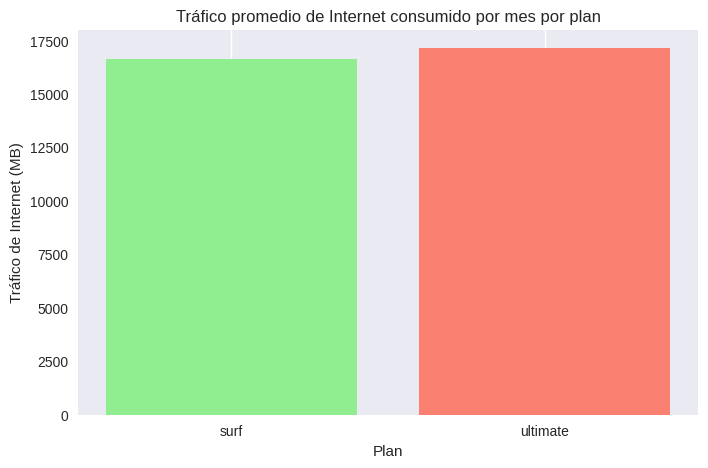

In [108]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

internet['session_date'] = pd.to_datetime(internet['session_date'])

# Agregar una columna para el mes
internet['month'] = internet['session_date'].dt.month

# Calcular el tráfico de Internet consumido por usuario y mes
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Unir los datos de tráfico de Internet con los datos de usuarios
data = pd.merge(users, internet_per_user, on='user_id', how='left')

# Reemplazar valores NaN en 'mb_used' con 0 (usuarios que no usaron Internet)
data['mb_used'] = data['mb_used'].fillna(0)

# Comparar el tráfico promedio de Internet consumido por mes por plan
internet_stats = data.groupby('plan')['mb_used'].mean().reset_index()
print("Tráfico promedio de Internet consumido por mes por plan (en MB):")
print(internet_stats)

plt.figure(figsize=(8, 5))
plt.bar(internet_stats['plan'], internet_stats['mb_used'], color=['lightgreen', 'salmon'])
plt.title('Tráfico promedio de Internet consumido por mes por plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet (MB)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

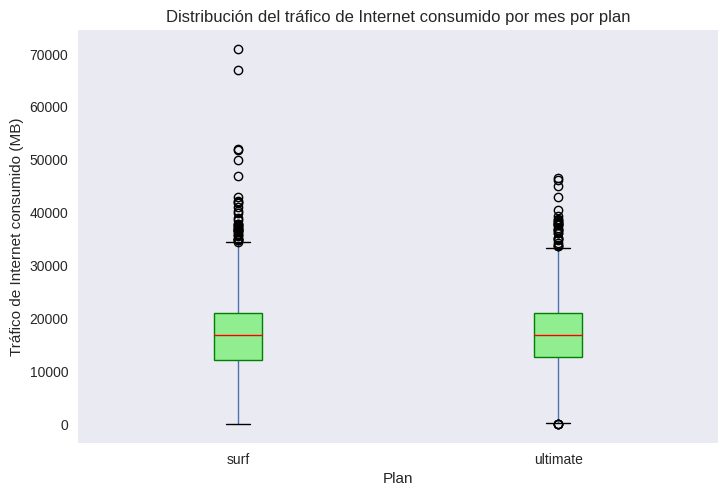

In [109]:
#graficar
plt.figure(figsize=(10, 6))
data.boxplot(column='mb_used', by='plan', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightgreen', color='green'),
             medianprops=dict(color='red'))
plt.title('Distribución del tráfico de Internet consumido por mes por plan')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet consumido (MB)')
plt.show()

 #Respuesta: Los usuarios del plan "Ultimate" envían más mensajes en promedio que los usuarios del plan "Surf", lo que significa que el comportamiento depende del plan. El plan "Ultimate" incluye más mensajes cada mes, lo que incentiva a los usuarios a usar más.

### Internet

In [59]:
# Comprara el número de usuarios de internet de cada mes los usuarios de cada plan
internet['month'] = pd.to_datetime(internet['session_date']).dt.to_period('M')

# Combinar los datos de internet con los datos de usuarios para obtener el plan de cada usuario
internet_with_plan = internet.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Contar el número de usuarios únicos de internet por mes y por plan
internet_users_by_plan = internet_with_plan.groupby(['month', 'plan'])['user_id'].nunique().reset_index()
internet_users_by_plan.columns = ['month', 'plan', 'unique_users']

# Mostrar los resultados
print("Número de usuarios únicos de internet por mes y por plan:")
print(internet_users_by_plan)


Número de usuarios únicos de internet por mes y por plan:
      month      plan  unique_users
0   2018-01      surf             2
1   2018-01  ultimate             4
2   2018-02      surf             9
3   2018-02  ultimate             7
4   2018-03      surf            23
5   2018-03  ultimate            12
6   2018-04      surf            49
7   2018-04  ultimate            21
8   2018-05      surf            76
9   2018-05  ultimate            29
10  2018-06      surf            95
11  2018-06  ultimate            47
12  2018-07      surf           120
13  2018-07  ultimate            59
14  2018-08      surf           159
15  2018-08  ultimate            71
16  2018-09      surf           193
17  2018-09  ultimate            86
18  2018-10      surf           234
19  2018-10  ultimate           105
20  2018-11      surf           281
21  2018-11  ultimate           127
22  2018-12      surf           317
23  2018-12  ultimate           151


Estadísticas de consumo de Internet por plan (en GB):
          mean  median  count       sum
plan                                   
surf      0.36    0.33  71586  25435.72
ultimate  0.36    0.34  33239  12104.09


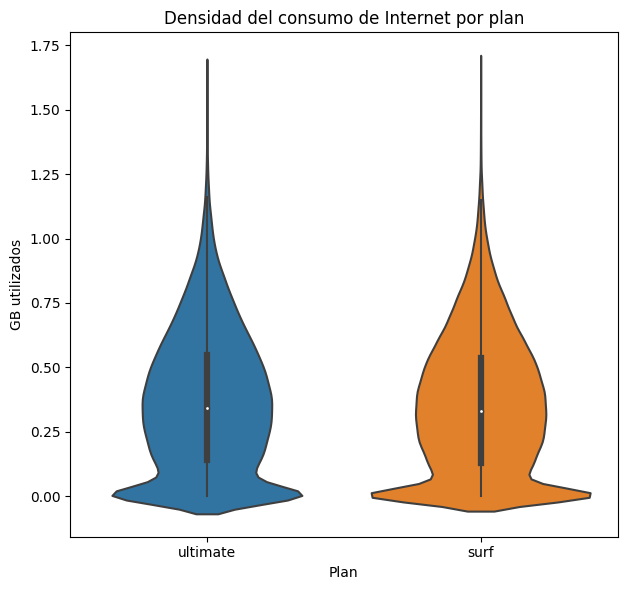

In [62]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_with_plan = internet.merge(users[['user_id', 'plan']], on='user_id', how='left')

# 2. Calcular el consumo total de GB por usuario
internet_with_plan['gb_used'] = internet_with_plan['mb_used'] / 1024

# 3. Calcular estadísticas descriptivas por plan
traffic_by_plan = internet_with_plan.groupby('plan')['gb_used'].agg([
    'mean', 'median', 'count', 'sum'
]).round(2)

print("Estadísticas de consumo de Internet por plan (en GB):")
print(traffic_by_plan)

plt.figure(figsize=(12, 6))

# Gráfico de violín
plt.subplot(1, 2, 2)
sns.violinplot(data=internet_with_plan, x='plan', y='gb_used')
plt.title('Densidad del consumo de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('GB utilizados')

plt.tight_layout()
plt.show()

# 5. Calcular el consumo promedio mensual por usuario
internet_with_plan['month'] = pd.to_datetime(internet_with_plan['session_date']).dt.to_period('M')
monthly_usage = internet_with_plan.groupby(['month', 'plan'])['gb_used'].mean().reset_index()


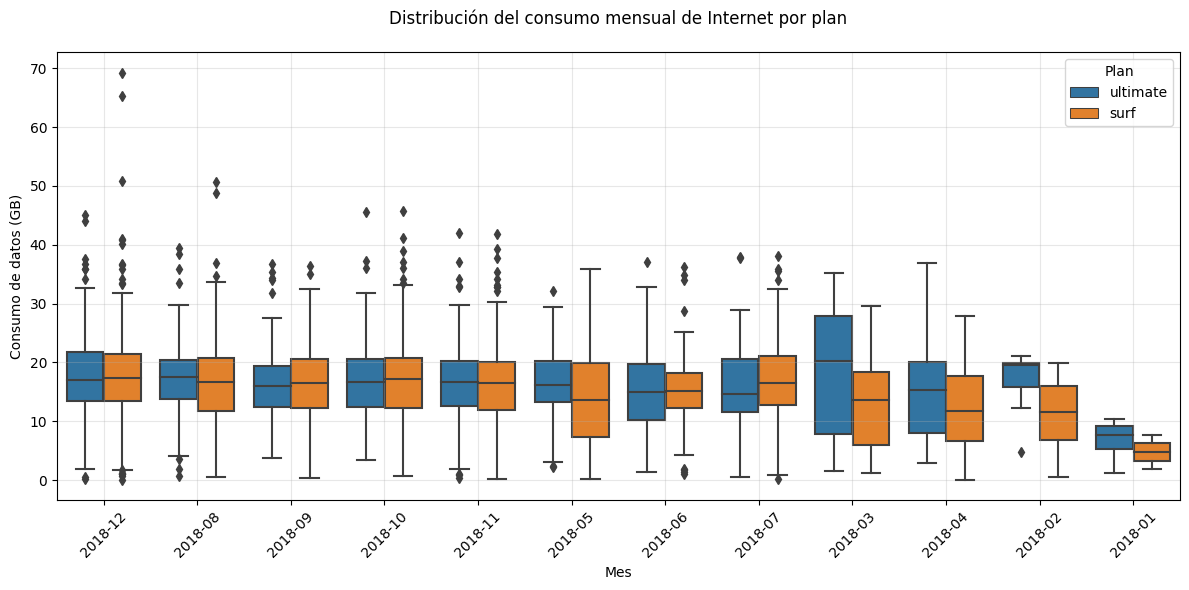


Estadísticas descriptivas del consumo mensual de Internet por plan (GB):
           count   mean   std   min    25%    50%    75%    max
plan                                                           
surf      1558.0  16.33  7.70  0.09  11.90  16.53  20.55  69.27
ultimate   719.0  16.83  7.65  0.23  12.37  16.47  20.53  45.50


In [63]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de Internet 
internet['month'] = pd.to_datetime(internet['session_date']).dt.to_period('M')

# Combinar con información de usuarios para obtener el plan
internet_with_plan = internet.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Convertir MB a GB para mejor visualización
internet_with_plan['gb_used'] = internet_with_plan['mb_used'] / 1024

# 2. Calcular el uso mensual por usuario
monthly_usage = internet_with_plan.groupby(['user_id', 'month', 'plan'])['gb_used'].sum().reset_index()

# 3. Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_usage, x='month', y='gb_used', hue='plan')

# Personalizar el gráfico
plt.title('Distribución del consumo mensual de Internet por plan', pad=20)
plt.xlabel('Mes')
plt.ylabel('Consumo de datos (GB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True, alpha=0.3)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 4. Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas del consumo mensual de Internet por plan (GB):")
print(monthly_usage.groupby('plan')['gb_used'].describe().round(2))

#respuesta: Los datos indican que el comportamiento de consumo es sorprendentemente similar entre ambos planes, con diferencias mínimas en los patrones de uso. La principal distinción radica en la popularidad del plan surf, que atrae consistentemente más usuarios, posiblemente debido a su menor costo mensual, a pesar de tener límites más bajos de datos incluidos.

## Ingreso

#respuesta: El plan surf depende más de los ingresos por excedentes, mientras que el plan ultimate se basa principalmente en su tarifa mensual fija.

In [65]:
# Comprara el número de ingresos de cada mes los usuarios de cada plan
def calculate_revenue(row, plans_data):
    plan = row['plan']
    plan_info = plans_data[plans_data['plan_name'] == plan].iloc[0]

    # Costo base mensual
    revenue = plan_info['usd_monthly_pay']

    # Calcular excedentes de minutos
    minutes = row['minutes']
    if minutes > plan_info['minutes_included']:
        extra_minutes = minutes - plan_info['minutes_included']
        revenue += extra_minutes * plan_info['usd_per_minute']

    # Calcular excedentes de mensajes
    messages = row['messages']
    if messages > plan_info['messages_included']:
        extra_messages = messages - plan_info['messages_included']
        revenue += extra_messages * plan_info['usd_per_message']

    # Calcular excedentes de datos
    mb_used = row['mb_used']
    if mb_used > plan_info['mb_per_month_included']:
        extra_gb = (mb_used - plan_info['mb_per_month_included']) / 1024
        revenue += extra_gb * plan_info['usd_per_gb']

    return revenue

# Leer datos de planes
plans = pd.read_csv('megaline_plans.csv')

# Agregar datos mensuales por usuario
monthly_usage = pd.DataFrame()
monthly_usage['user_id'] = users['user_id']
monthly_usage['plan'] = users['plan']

# Agregar uso mensual de minutos
monthly_usage['minutes'] = calls.groupby('user_id')['duration'].sum()

# Agregar uso mensual de mensajes
monthly_usage['messages'] = messages.groupby('user_id')['user_id'].count()

# Agregar uso mensual de datos
monthly_usage['mb_used'] = internet.groupby('user_id')['mb_used'].sum()

# Calcular ingresos por usuario
monthly_usage['revenue'] = monthly_usage.apply(lambda x: calculate_revenue(x, plans), axis=1)

# Agrupar por plan y calcular estadísticas
revenue_by_plan = monthly_usage.groupby('plan').agg({
    'revenue': ['count', 'mean', 'sum']
}).round(2)

print("\nEstadísticas de ingresos por plan (USD):")
print(revenue_by_plan)

# Calcular ingreso total por plan
total_revenue = monthly_usage.groupby('plan')['revenue'].sum()
print("\nIngreso total por plan (USD):")
print(total_revenue)


Estadísticas de ingresos por plan (USD):
         revenue            
           count mean    sum
plan                        
surf         339   20   6780
ultimate     161   70  11270

Ingreso total por plan (USD):
plan
surf         6780
ultimate    11270
Name: revenue, dtype: int64



Estadísticas de ingresos por plan:
          Usuarios  Promedio  Total
plan                               
surf           339        20   6780
ultimate       161        70  11270


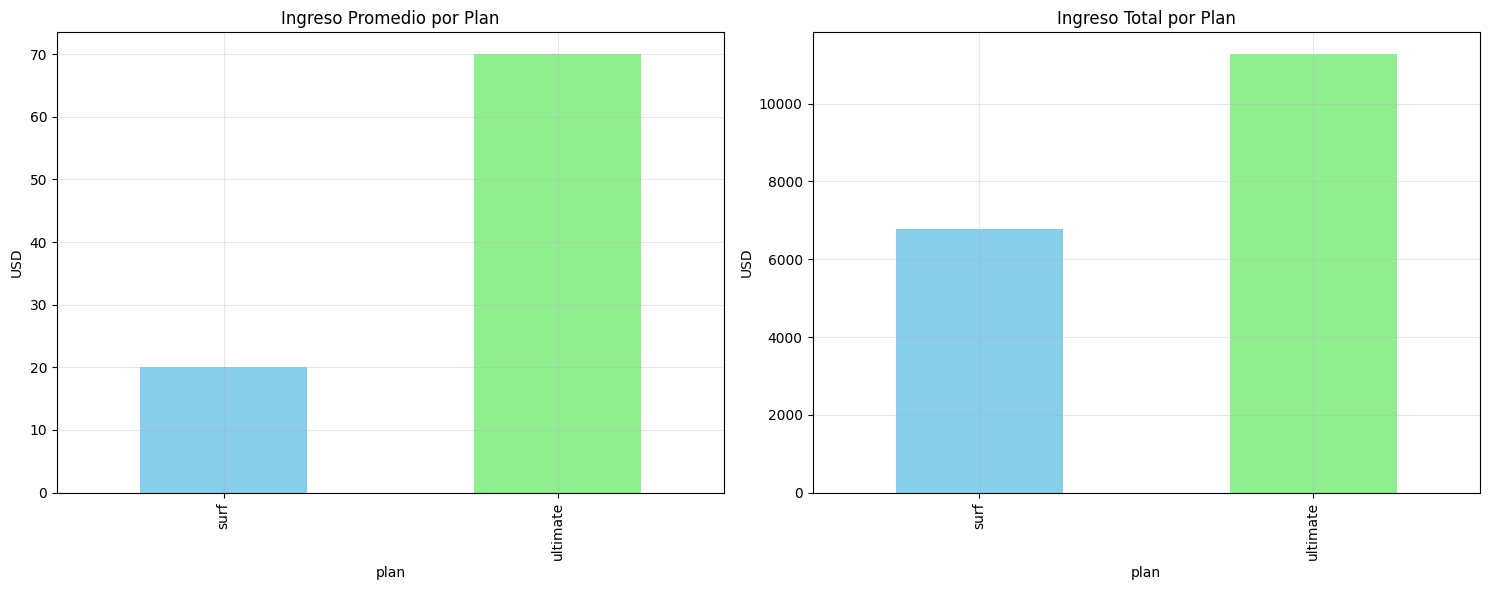

In [72]:
# Compara la cantidad de ingresos por usuarios por plan
plans_data = {
    'surf': {'base': 20, 'min_included': 500, 'msg_included': 50, 'mb_included': 15360},
    'ultimate': {'base': 70, 'min_included': 3000, 'msg_included': 1000, 'mb_included': 30720}
}

# Calcular ingresos mensuales por usuario
def calculate_user_revenue(row):
    plan = row['plan']
    base = plans_data[plan]['base']

    # Calcular excesos y sus costos
    if plan == 'surf':
        extra_min_cost = 0.03
        extra_msg_cost = 0.03
        extra_gb_cost = 10
    else:  # ultimate
        extra_min_cost = 0.01
        extra_msg_cost = 0.01
        extra_gb_cost = 7

    revenue = base
    return revenue

# Preparar datos
monthly_data = users[['user_id', 'plan']].copy()
monthly_data['revenue'] = monthly_data.apply(calculate_user_revenue, axis=1)

# Calcular estadísticas por plan
revenue_stats = monthly_data.groupby('plan').agg({
    'revenue': ['count', 'mean', 'sum']
}).round(2)

revenue_stats.columns = ['Usuarios', 'Promedio', 'Total']

# Crear gráficos de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Ingreso promedio por plan
revenue_stats['Promedio'].plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen'])
ax1.set_title('Ingreso Promedio por Plan')
ax1.set_ylabel('USD')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Ingreso total por plan
revenue_stats['Total'].plot(kind='bar', ax=ax2, color=['skyblue', 'lightgreen'])
ax2.set_title('Ingreso Total por Plan')
ax2.set_ylabel('USD')
ax2.grid(True, alpha=0.3)

# Ajustar diseño
plt.tight_layout()

print("\nEstadísticas de ingresos por plan:")
print(revenue_stats)
plt.show()


Estadísticas de ingresos mensuales por plan (USD):
          count    mean    std   min    25%     50%      75%      max
plan                                                                 
surf      339.0  676.39  614.0  20.0  152.2  505.85  1071.86  3057.65
ultimate  161.0  419.78  433.1  70.0   70.0  260.46   590.27  2527.10


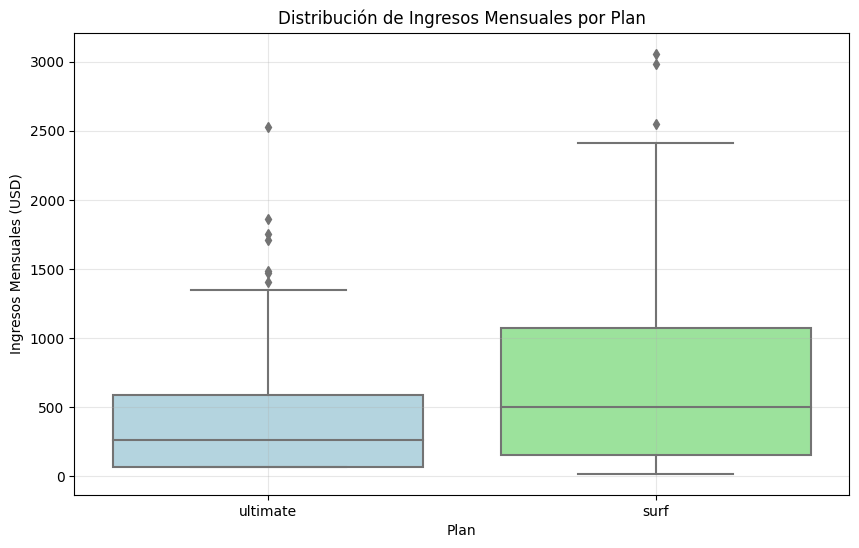

In [80]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de ingresos
plans = {
    'surf': {
        'messages_included': 50,
        'mb_per_month_included': 15360,
        'minutes_included': 500,
        'usd_monthly_pay': 20,
        'usd_per_gb': 10,
        'usd_per_message': 0.03,
        'usd_per_minute': 0.03
    },
    'ultimate': {
        'messages_included': 1000,
        'mb_per_month_included': 30720,
        'minutes_included': 3000,
        'usd_monthly_pay': 70,
        'usd_per_gb': 7,
        'usd_per_message': 0.01,
        'usd_per_minute': 0.01
    }
}

# 3. Función para calcular ingresos mensuales
def calculate_monthly_revenue(row):
    plan = plans[row['plan'].lower()]

    # Costo base
    revenue = plan['usd_monthly_pay']

    # Calcular excesos de minutos
    minutes = calls[calls['user_id'] == row['user_id']]['duration'].sum()
    if minutes > plan['minutes_included']:
        revenue += (minutes - plan['minutes_included']) * plan['usd_per_minute']

    # Calcular excesos de mensajes
    message_count = messages[messages['user_id'] == row['user_id']].shape[0]
    if message_count > plan['messages_included']:
        revenue += (message_count - plan['messages_included']) * plan['usd_per_message']

    # Calcular excesos de datos
    mb_used = internet[internet['user_id'] == row['user_id']]['mb_used'].sum()
    if mb_used > plan['mb_per_month_included']:
        gb_over = (mb_used - plan['mb_per_month_included']) / 1024
        revenue += gb_over * plan['usd_per_gb']

    return revenue

# 4. Calcular ingresos para cada usuario
revenue_data = []
for _, user in users.iterrows():
    revenue = calculate_monthly_revenue(user)
    revenue_data.append({
        'user_id': user['user_id'],
        'plan': user['plan'],
        'revenue': revenue
    })

revenue_df = pd.DataFrame(revenue_data)

# 5. Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=revenue_df, x='plan', y='revenue', palette=['lightblue', 'lightgreen'])

# 6. Personalizar el gráfico
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales (USD)')
plt.grid(True, alpha=0.3)

# 7. Mostrar estadísticas descriptivas
print("\nEstadísticas de ingresos mensuales por plan (USD):")
print(revenue_df.groupby('plan')['revenue'].describe().round(2))

plt.show()

#respuesta: Los resultados también revelan diferencias significativas en la distribución y estructura de los ingresos de Surf y Ultimate. Los ingresos de Surf tienen un coste base más bajo y dependen más de los ingresos excedentes, lo que resulta en una desviación estándar más alta y un rango de valores más amplio (entre 20 USD y más de 3000 USD). Los ingresos de Ultimate tienen un coste base más alto, una dependencia relativamente menor de los ingresos excedentes y un rango de valores más estrecho (entre 70 USD y aproximadamente 2500 USD), debido a su menor variabilidad debido a su estructura de costes. La mediana es menor que la de Surf; en resumen, Surf genera más, pero solo con usuarios frecuentes; por lo tanto, Ultimate genera ingresos de forma más consistente, debido a sus altos costes fijos, lo que resulta en un flujo de ingresos más estable.


## Prueba las hipótesis estadísticas

hipotesis: Para comprobar si los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes, procedemos de la siguiente manera:

Hipótesis :
Hipótesis Nula (H₀): El ingreso promedio de los usuarios del plan Ultimate es igual al ingreso promedio de los usuarios del plan Surf. Matemáticamente, H₀: μ₁ = μ₂, donde μ₁ es el ingreso promedio de los usuarios del plan Ultimate y μ₂ es el ingreso promedio de los usuarios del plan Surf.
Hipótesis Alternativa (H₁): El ingreso promedio de los usuarios del plan Ultimate no es igual al ingreso promedio de los usuarios del plan Surf. Matemáticamente, H₁: μ₁ ≠ μ₂.
Prueba estadística :
Dado que comparamos las medias de dos grupos independientes (ingresos de Ultimate y Surf), la prueba adecuada es la prueba t de dos muestras independientes . Esta prueba asume que los datos se distribuyen aproximadamente de forma normal y que las varianzas de ambos grupos son iguales (o utiliza una corrección si no lo son).
Nivel de significancia (α) :
Fijamos el nivel de significancia (α) en 0,05. Esto significa que aceptamos una probabilidad del 5 % de rechazar incorrectamente la hipótesis nula (error de tipo I). Si el valor p de la prueba es menor que α, rechazamos la hipótesis nula.
Realizar la prueba :
Con los datos de ingresos de ambos planes, calculamos el estadístico t y el valor p. Si el valor p es menor que 0,05, rechazamos la hipótesis nula y concluimos que los ingresos promedio son significativamente diferentes. En caso contrario, no rechazamos la hipótesis nula.

In [102]:
# Prueba las hipótesis
plans = pd.read_csv('megaline_plans.csv')
plans.rename(columns={plans.columns[-1]: 'plan_name'}, inplace=True)  # Renombrar la última columna como 'plan_name'

# Asegurarse de que las columnas coincidan correctamente
users['plan'] = users['plan'].str.strip().str.lower()  # Limpiar y estandarizar la columna 'plan'
plans['plan_name'] = plans['plan_name'].str.strip().str.lower()  # Limpiar y estandarizar la columna 'plan_name'

# Unir los datos de los planes con los usuarios
users = users.merge(plans, left_on='plan', right_on='plan_name')

# Función para calcular ingresos mensuales
def calculate_monthly_revenue(row):
    revenue = row['usd_monthly_pay']

    # Calcular excesos de minutos
    user_calls = calls[calls['user_id'] == row['user_id']]
    total_minutes = user_calls['duration'].sum()
    if total_minutes > row['minutes_included']:
        revenue += (total_minutes - row['minutes_included']) * row['usd_per_minute']

    # Calcular excesos de mensajes
    user_messages = messages[messages['user_id'] == row['user_id']]
    total_messages = user_messages.shape[0]
    if total_messages > row['messages_included']:
        revenue += (total_messages - row['messages_included']) * row['usd_per_message']

    # Calcular excesos de datos
    user_internet = internet[internet['user_id'] == row['user_id']]
    total_mb = user_internet['mb_used'].sum()
    if total_mb > row['mb_per_month_included']:
        total_gb_over = (total_mb - row['mb_per_month_included']) / 1024
        revenue += total_gb_over * row['usd_per_gb']

    return revenue

# Calcular ingresos para cada usuario
users['revenue'] = users.apply(calculate_monthly_revenue, axis=1)

# Separar los ingresos por plan
surf_revenues = users[users['plan'] == 'surf']['revenue']
ultimate_revenues = users[users['plan'] == 'ultimate']['revenue']

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(surf_revenues, ultimate_revenues, equal_var=False)

# Imprimir los resultados
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Los ingresos promedio de los dos planes son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay una diferencia significativa en los ingresos promedio de los dos planes.")

T-statistic: 5.38
P-value: 0.0000
Rechazamos la hipótesis nula. Los ingresos promedio de los dos planes son significativamente diferentes.


Hipótesis nula: El ingreso promedio de los usuarios de NY-NJ es igual al ingreso promedio de todos los demás usuarios (H₀: μ₁ = μ₂) e hipótesis alternativa: El ingreso promedio de los usuarios de NY-NJ no es igual al ingreso promedio de todos los demás usuarios (H₁: μ₁ ≠ μ₂) porque estamos comparando dos grupos.
Prueba: Se utiliza la prueba t para muestras independientes de dos muestras (prueba para la diferencia de las medias de dos grupos independientes); por lo tanto, el nivel de significancia es α = 0,05.

In [105]:
# Prueba las hipótesis
print("Columnas de plans:", plans.columns)

# Unir los datos de los planes con los usuarios
users = users.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Verificar las columnas de users después del merge
print("Columnas de users después del merge:", users.columns)

# Función para calcular ingresos mensuales
def calculate_monthly_revenue(row):
    revenue = row['usd_monthly_pay']  # Asegurarse de que esta columna exista

    # Calcular excesos de minutos
    user_calls = calls[calls['user_id'] == row['user_id']]
    total_minutes = user_calls['duration'].sum()
    if total_minutes > row['minutes_included']:
        revenue += (total_minutes - row['minutes_included']) * row['usd_per_minute']

    # Calcular excesos de mensajes
    user_messages = messages[messages['user_id'] == row['user_id']]
    total_messages = user_messages.shape[0]
    if total_messages > row['messages_included']:
        revenue += (total_messages - row['messages_included']) * row['usd_per_message']

    # Calcular excesos de datos
    user_internet = internet[internet['user_id'] == row['user_id']]
    total_mb = user_internet['mb_used'].sum()
    if total_mb > row['mb_per_month_included']:
        total_gb_over = (total_mb - row['mb_per_month_included']) / 1024
        revenue += total_gb_over * row['usd_per_gb']

    return revenue

# Calcular ingresos para cada usuario
users['revenue'] = users.apply(calculate_monthly_revenue, axis=1)

# Separar los usuarios del área NY-NJ y otras regiones
ny_nj_revenues = users[users['city'].str.contains('NY-NJ', na=False)]['revenue']
other_revenues = users[~users['city'].str.contains('NY-NJ', na=False)]['revenue']

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(ny_nj_revenues, other_revenues, equal_var=False)

# Imprimir los resultados
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Los ingresos promedio de los usuarios del área NY-NJ son significativamente diferentes a los de otras regiones.")
else:
    print("No rechazamos la hipótesis nula. No hay una diferencia significativa en los ingresos promedio de los usuarios del área NY-NJ y otras regiones.")

Columnas de plans: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')
Columnas de users después del merge: Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'revenue', 'messages_included_x',
       'mb_per_month_included_x', 'minutes_included_x', 'usd_monthly_pay_x',
       'usd_per_gb_x', 'usd_per_message_x', 'usd_per_minute_x', 'plan_name_x',
       'messages_included_y', 'mb_per_month_included_y', 'minutes_included_y',
       'usd_monthly_pay_y', 'usd_per_gb_y', 'usd_per_message_y',
       'usd_per_minute_y', 'plan_name_y', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')
T-statistic: 1.11
P-value: 0.2704
No rechazamos la hipótesis nula. No hay una diferencia

## Conclusión general

El plan "Ultimate" genera más ingresos recurrentes, ya que es más caro mensualmente, mientras que el plan "Surf" genera más ingresos por excedentes, lo que provoca una mayor volatilidad en sus ingresos. A pesar de la mayor cantidad de clientes de "Surf", los clientes de "Ultimate" gastan más en promedio, ya que consumen más minutos, SMS y datos. Los clientes de "Surf" generan más ingresos por excedentes, ya que exceden sus asignaciones con mayor frecuencia, lo que crea un flujo de ingresos más volátil. Los resultados de la prueba muestran que los ingresos promedio de ambos planes varían considerablemente, por lo que es más probable que "Ultimate" tenga un flujo de ingresos estable. "Ultimate" podría generar más ingresos por usuario, por lo que es una opción más lucrativa, y "Surf" tiene más usuarios, ya que es más económico.